# Principal Component Analysis with Cancer Data

In [16]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [17]:
#read the dataset

cancerDf=pd.read_csv('breast-cancer-wisconsin-data.csv')
cancerDf.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [18]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

cancerDf=cancerDf.drop('ID',axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [19]:
cancerDf.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [20]:
cancerDf.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [21]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

cancerDf.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [22]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

# We see Bare Nuclei column is showing in dataframe as object even though it should be numeric. So checking the values from this

temp = pd.DataFrame(cancerDf["Bare Nuclei"].str.isdigit())  # if the string is made of digits store True else False  in the bare nuclei
temp[temp['Bare Nuclei'] == False].count()   # from temp take only those rows where Bare Nuclei has false


Bare Nuclei    16
dtype: int64

In [23]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

cancerDf = cancerDf.replace('?', np.nan)
cancerDf = cancerDf.apply(lambda x: x.fillna(x.median()),axis=0)  #replacing it with median


# converting the Bare Nuclei column from object / string type to float
cancerDf['Bare Nuclei'] = cancerDf['Bare Nuclei'].astype('float64')  


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


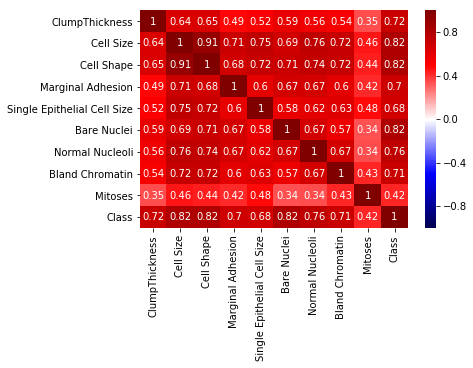

In [14]:
# Check for correlation of variable


corr = cancerDf.corr()

sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


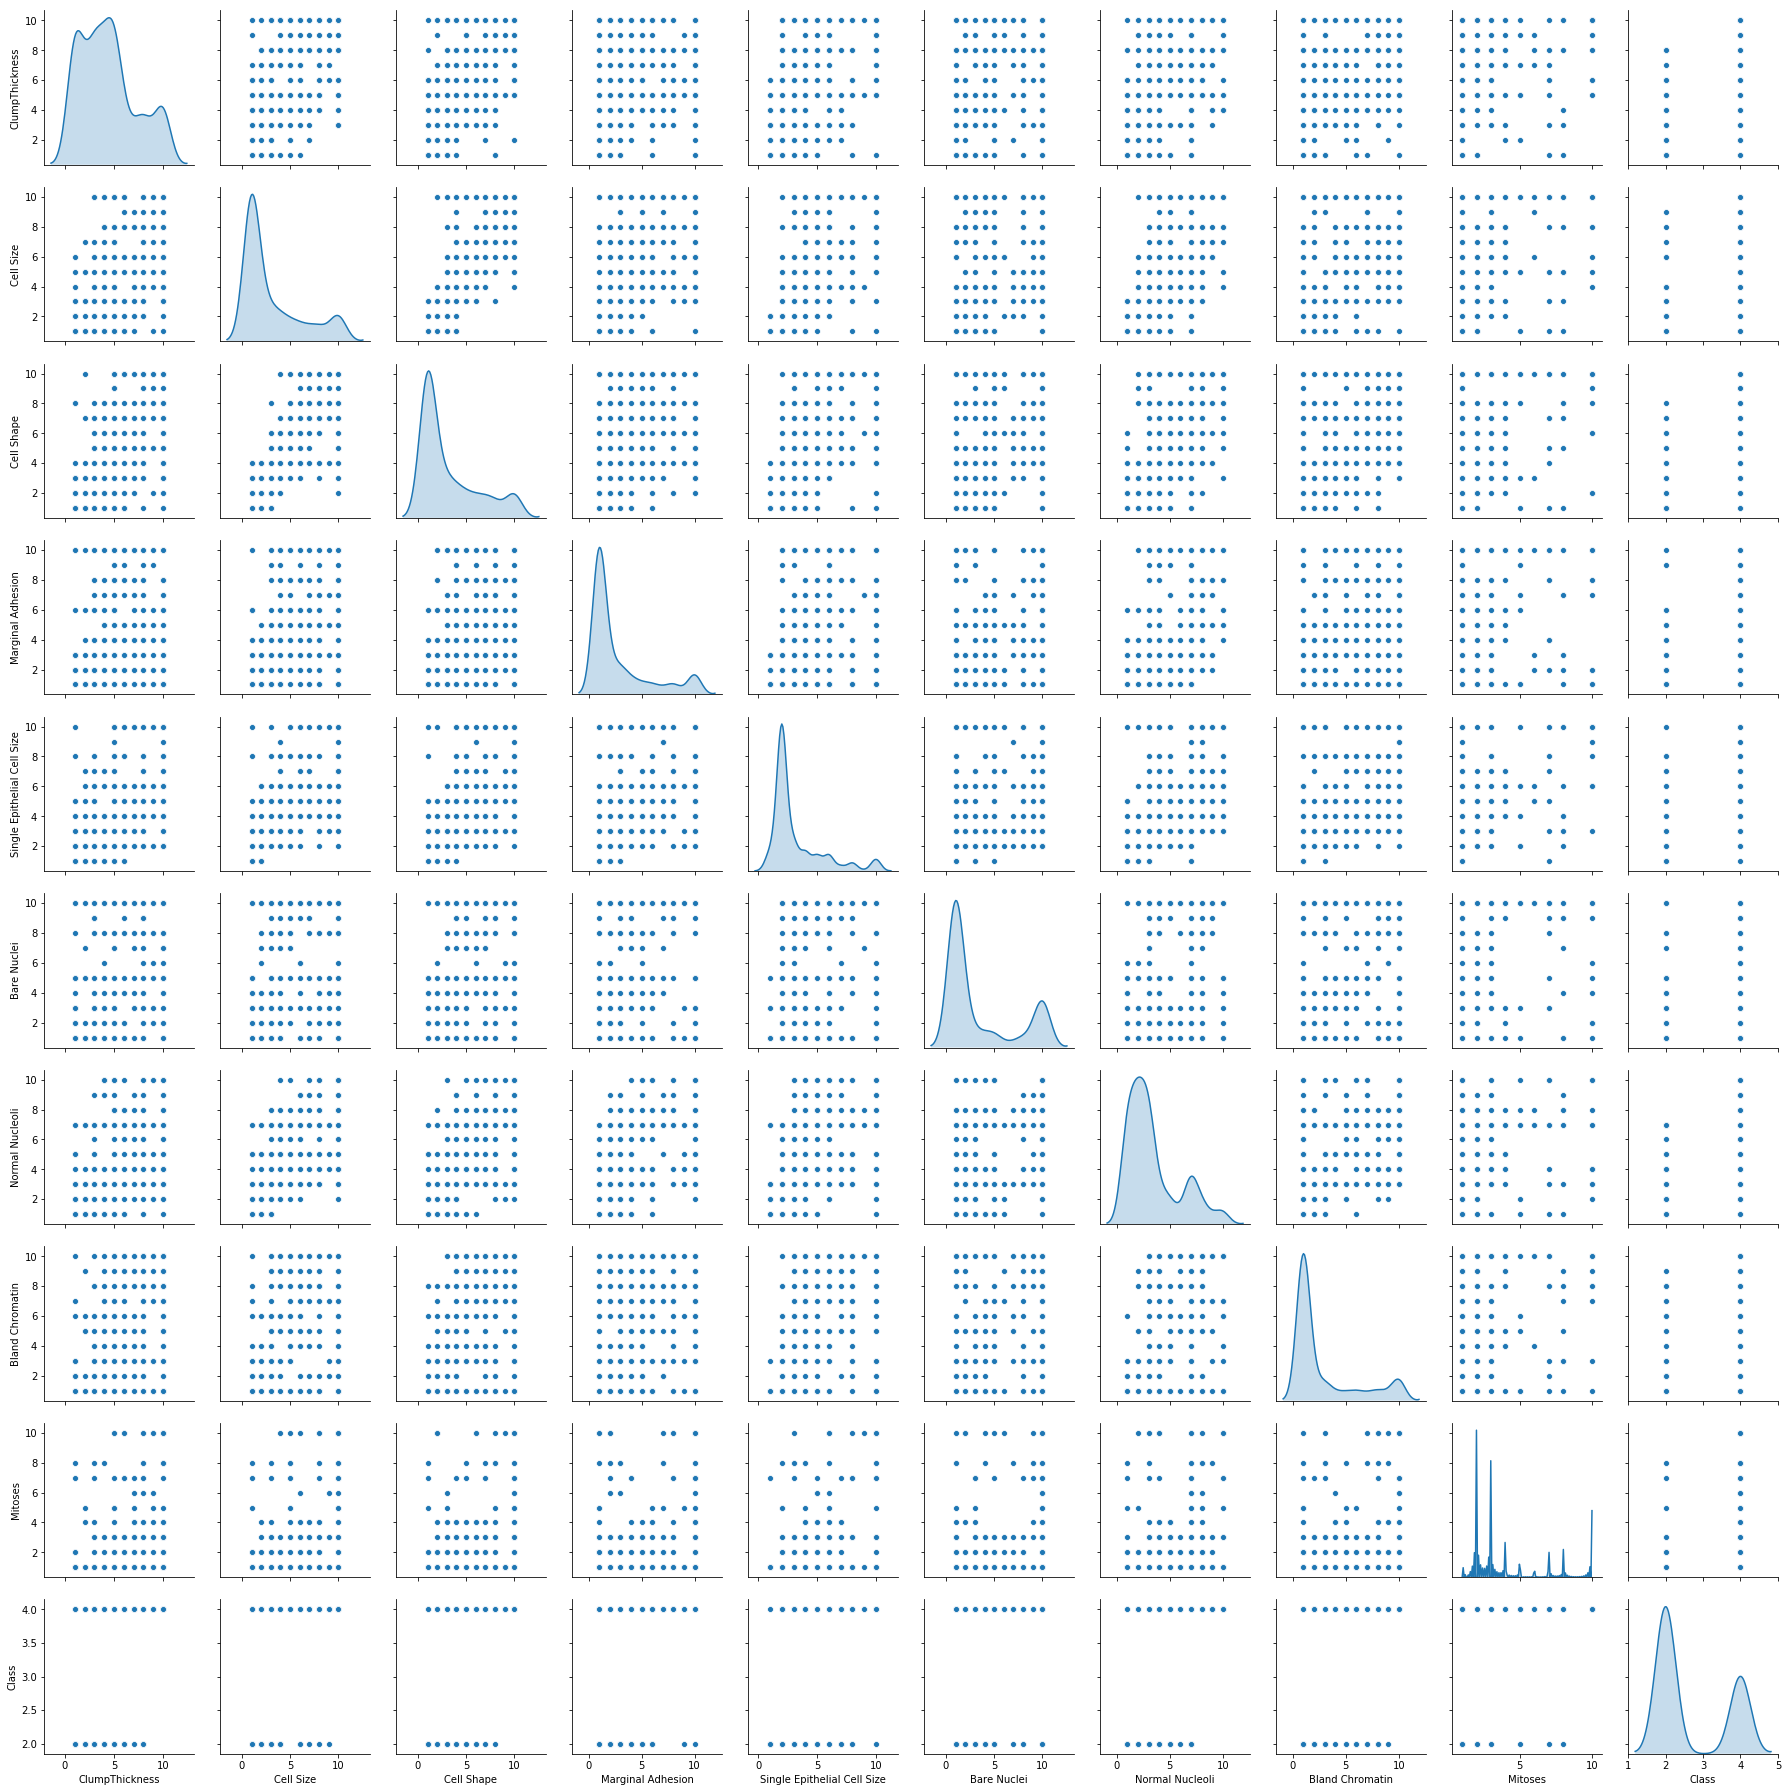

In [24]:
#Let us check for pair plots
sns.pairplot(cancerDf,diag_kind='kde')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [25]:
y=cancerDf['Class'] #holding on Class in other frame
X=cancerDf.drop('Class',axis=1) # dropping class as its dependent variable

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std =  sc.fit_transform(X)        


# Q6 Create a covariance matrix for identifying Principal components

In [28]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34288766
  0.34466258 0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [29]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n %s', eig_vecs)
print('\n Eigen Values \n %s', eig_vals)

Eigen Vectors 
 %s [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [30]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8
0,5.898552,0.775883,0.539602,0.088949,0.466406,0.381018,0.262335,0.304056,0.296095


In [35]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("\n Variance : ",var_exp)
print("\n Cumulative Variance Explained : ", cum_var_exp)


 Variance :  [65.44570379762203, 8.608589755529701, 5.986995473919927, 5.1748700418633105, 4.227474060797515, 3.373565908122141, 3.2852348730473824, 2.910658031149293, 0.9869080579486803]

 Cumulative Variance Explained :  [ 65.4457038   74.05429355  80.04128903  85.21615907  89.44363313
  92.81719904  96.10243391  99.01309194 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_std)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [57]:
principalDf

,principal component 1,principal component 2
0,-1.456220,-0.110210
1,1.466279,-0.544894
2,-1.579311,-0.074854
3,1.505247,-0.558853
4,-1.330551,-0.089657
5,5.054140,-1.542614
6,-1.057400,-0.518582
7,-1.651934,0.016774
8,-1.526659,2.354349
9,-1.580810,0.019803


In [58]:
#How much the componenets bringing in the Variance.
#Principal components 1 is explaining 65% of variance of total features
#Principal component 2 is explaining 8.6% of variance of total features
pca.explained_variance_ratio_

array([0.65445704, 0.0860859 ])

# Q10 Find correlation between components and features

In [59]:
# creating a dataframe by combining components and features

finalDf = pd.concat([principalDf, cancerDf], axis = 1)

In [60]:
#check the dataframe
finalDf.head()

,principal component 1,principal component 2,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-1.456220,-0.110210,5,1,1,1,2,1.0,3,1,1,2
1,1.466279,-0.544894,5,4,4,5,7,10.0,3,2,1,2
2,-1.579311,-0.074854,3,1,1,1,2,2.0,3,1,1,2
3,1.505247,-0.558853,6,8,8,1,3,4.0,3,7,1,2
4,-1.330551,-0.089657,4,1,1,3,2,1.0,3,1,1,2


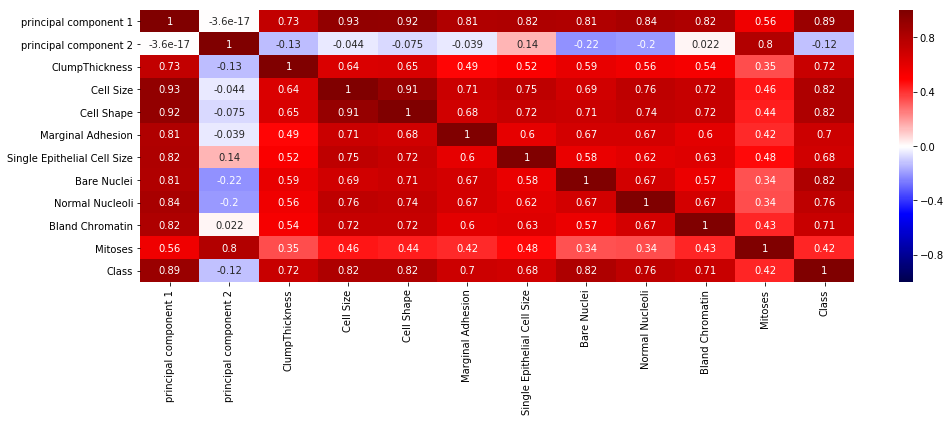

In [61]:
# Check for correlation between components and features

corr = finalDf.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

#Below is the correlation plot for component and features.
# We see the component 1 has all features strong correlation. As it was expected from the eigan value and variance which was
# caclulated above. The principle component 1 is bringin in 65% variance.

# Althogh for here I also used principle componennt 2 (the eigan value is less than 1) to check, there is no much correlation
# with the features. We see that Metosis has significant correlation in Principle component 2

# Also we  see that Principle Component1 and Principle component 2 are not at all correlated.